<a href="https://colab.research.google.com/github/feliperodighero/Machine-Learning-Study/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import graphviz
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [13]:
df = pd.read_csv('insurance.csv')

In [14]:
df.shape

(20000, 28)

In [15]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [16]:
df.dropna(inplace=True)

In [17]:
df.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
5,False,Adult,UpperMiddle,Normal,Current,Moderate,EggShell,Moderate,SportsCar,Poor,...,Suburb,True,HundredThou,HundredThou,True,TenThou,Poor,True,Thousand,Many
6,False,Senior,UpperMiddle,Normal,Current,Mild,Football,Mild,Economy,Poor,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
7,False,Adult,Prole,Normal,Older,Severe,EggShell,Severe,Economy,Poor,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many


In [18]:
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]].values
y = df.iloc[:, 7].values

In [19]:
label_encoder = LabelEncoder()

In [20]:
for i in range(X.shape[1]):
    if X[:, i].dtype == 'object':
        X[:, i] = label_encoder.fit_transform(X[:, i])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
model = RandomForestClassifier(random_state=1, n_estimators=500, max_depth=8, max_leaf_nodes=8)

In [36]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=8, n_estimators=500,
                       random_state=1)

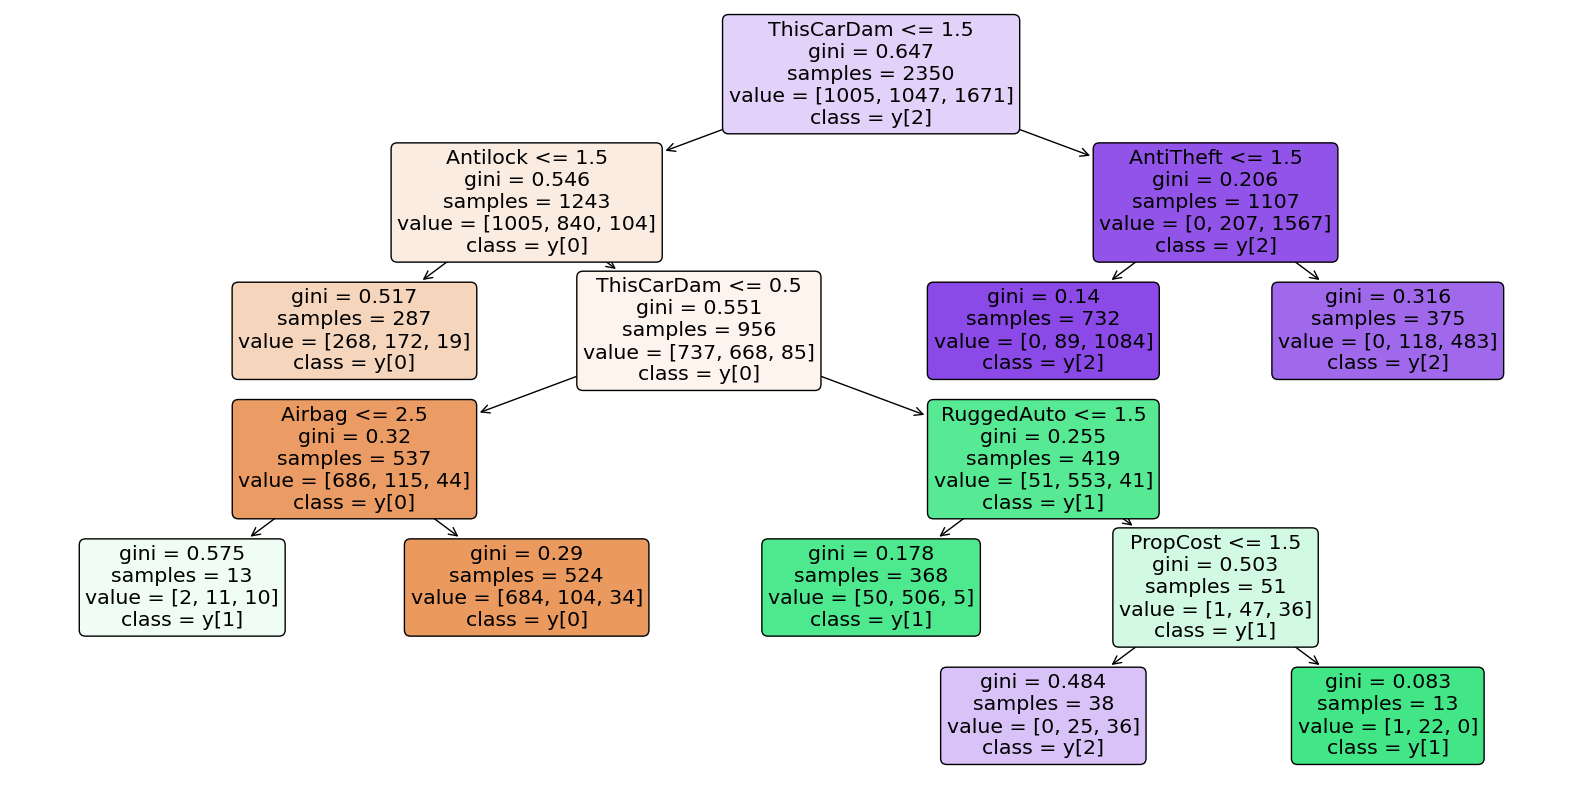

In [41]:
tree_index = 0

tree_to_visualize = model.estimators_[tree_index]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, filled=True, feature_names=df.columns[:-1], class_names=True, rounded=True)
plt.show()

In [37]:
results = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, results)
precision = precision_score(y_test, results, average='weighted')
recall = recall_score(y_test, results, average='weighted')
f1 = f1_score(y_test, results, average='weighted')

In [39]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.8515037593984962
Precision: 0.8490947489495771
Recall: 0.8515037593984962
F1: 0.848849598293294


In [40]:
report = classification_report(y_test, results)
print(report)

              precision    recall  f1-score   support

        Mild       0.88      0.89      0.89       423
    Moderate       0.80      0.71      0.75       497
      Severe       0.86      0.93      0.90       676

    accuracy                           0.85      1596
   macro avg       0.85      0.84      0.85      1596
weighted avg       0.85      0.85      0.85      1596

